In [3]:
library(Matrix)
library(far)
library(MASS)
library(pracma)
library(expm)

Loading required package: nlme
far library : Modelization for Functional AutoRegressive processes

version 0.6-4 (2014-12-07)


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu


Attaching package: ‘expm’

The following objects are masked from ‘package:pracma’:

    expm, logm, sqrtm

The following object is masked from ‘package:Matrix’:

    expm



<h2 style="color:red'"> Orthogonal </h2>

- Two vectors  $\vec{v_1}$ and $\vec{v_2} \in R^m$ are orthogonal, if $\vec{v_1} \centerdot \vec{v_2}=0$
- Note that the dot product produce scalar quantity 0 not $\vec{0}$



- Notice $\vec{v}_1$ is size of 3 vector and `orth( )` returns normalized $\vec{v}_1$

In [4]:
v1 <- c(3,4,5)

<h2 style="color:blue'">  Normalize the basis </h2>

In [6]:
c_A <- orth(v1)
print(c_A)

          [,1]
[1,] 0.4242641
[2,] 0.5656854
[3,] 0.7071068


In [10]:
#notice what happens when you dot v1 and c_A
print(v1%*%c_A)

         [,1]
[1,] 7.071068


In [9]:
Norm(v1)

[1] 7.071068

<h2 style="color:red'">  Space, subspace, orthogonal complement subspace </h2>

- Let $S$ be space of $R^n$, $A$ is $R^{mxn}$ matrix. 
- Let $C(A)$ and $N(A^T)$ be the column space and left nullspace of $A$
- $C(A)$ and $N(A^T)$ are orthogonal complement subspace of each other.
- Then, any vector, $\vec{x} \in S$ but $\vec{x} \notin C(A) \text{ or } \vec{x} \notin N(A^T)$ <br>
can be expressed by the linear combination of basis of $C(A) \text{ and } N(A^T)$

<h2 style="color:blue'">  Diagonal matrix </h2>

In [26]:
D1 <- diag(c(5,2,10),3,3)
print(D1)

     [,1] [,2] [,3]
[1,]    5    0    0
[2,]    0    2    0
[3,]    0    0   10


In [28]:
print(inv(D1)) #notice when the diagonal elements has zero in it, D1 becomes singular.

     [,1] [,2] [,3]
[1,]  0.2  0.0  0.0
[2,]  0.0  0.5  0.0
[3,]  0.0  0.0  0.1


In [23]:
print(D1 %^% 3) # using the function in expm

     [,1] [,2] [,3]
[1,]  125    0    0
[2,]    0    8    0
[3,]    0    0 1000


<h2 style="color:blue'">  Orthogonal matrix </h2>

$$U^{-1} = U^T$$

- Let $W$ be a subspace of $R^n$ and let $\vec{y} \in R^n$ but $\vec{y} \notin W$.  
- Then, $\hat{\vec{y}} \in W$ that is the closest approximation of $\vec{y}$ is the $\vec{y}$ projected onto $W$

<h2 style="color:red'"> Proerty of matrx that is not square, but has orthonormal basis. </h2>

In [3]:
v <- matrix(c(2,1,2),nrow=3)
O <- orthonormalization(v)
print(O)

          [,1]       [,2]       [,3]
[1,] 0.6666667 -0.2357023 -0.7071068
[2,] 0.3333333  0.9428090  0.0000000
[3,] 0.6666667 -0.2357023  0.7071068


In [6]:
U <- cbind(O[,1],O[,2])
print(t(U)%*%U)

     [,1] [,2]
[1,]    1    0
[2,]    0    1


Suppose $C$ is matrix that contains orthonormal basis of $W$.  Since there exist $\vec{y} \notin W$, $C$ can't be square matrix. <br>

However, the basis in $C$ can still be ```orthonormal```.  <br>

Let $C$ be retangular matrix with orthonormal basis,

$$\vec{y} = C\vec{x}_w + N\vec{x}_N$$ 
where 
- $N$ is the basis spanning orthogonal complement subspace of $W$. Then,<br><br>
 $$C^{T}\vec{y} = C^TC\vec{x}_w$$ <br>
 
Since $C$ is matrix that contains orthonormal basis, $C^TC$ becomes identify matrix. <br><br>
$$C^{T}\vec{y} = \vec{x}_W $$ <br>
Now, the location of $\hat{\vec{y}}$ in terms of the basis in $C$ can be expressed as below <br>
$$C\vec{x}_W = \hat{\vec{y}}$$ <br>

Solving for $\vec{x}_W$
$$\vec{x}_W = C^T\hat{\vec{y}}$$<br>

Sub the above expression of $\vec{x}_W$ to the following equation

$$C^{T}\vec{y} = C^TC\vec{x}_w$$ <br>

$$C^{T}\vec{y} = C^TC(C^T\hat{\vec{y}})$$ <br>

Then,

$$CC^T\vec{y} = \hat{\vec{y}}$$

## Good example found the following link

[LINK](https://cran.r-project.org/web/packages/matlib/vignettes/gramreg.html)


<h1 style ="color:red'"> Determinants (see chapter 3) </h1>

- `determinant` can be used to test the invertiblity of a matrix <br><br>

- `determinant` measures the amount by which a linear transformation changes the area of a figure. When applied locally, this technique answers the question of map's expansion rate near the poles.  This idea plays a critical role in multivariable calculus in the form of the `Jacobian`.<br><br>

- If $A$ is a 2 x 2 matrix, the area of the parallelogram determined by the columns of $A$ is determinant of $A$. If $A$ is a 3 x 3 matrix, the volume of the box can be determined by the determinant of $A$. 
    
    
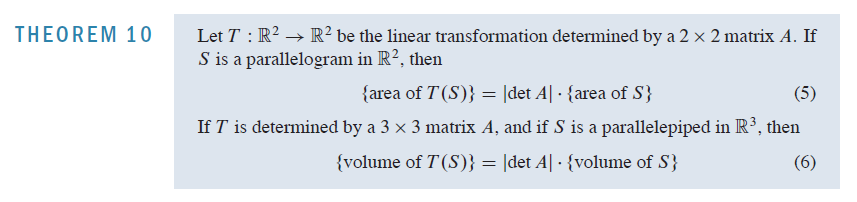

<h2 style="color:red'">  Gram–Schmidt process </h2>

- Let {$\vec{x}_1,\vec{x}_2...\vec{x}_p$} be basis for a nonzero subspace $W$ of $R^n$ where $p < n$. <br><br>
Gram-Schimidt process converts {$\vec{x}_1,\vec{x}_2...\vec{x}_p$} to  {$\vec{v}_1,\vec{v}_2...\vec{v}_p$} where  {$\vec{v}_1,\vec{v}_2...\vec{v}_p$} are orthogonal basis for $W$ <br><br>


- Gram-Schimit process is projecting one set of basis to another basis that is orthogonal to them. <br><br>


- Notice the `orthonormalization( )` in `R` returns 3 x 3 matrix.  This function in R returns the basis spanning the subspace that is orthogonal to subspace spanned by $\vec{v}_1$ 




In [8]:
GS <- orthonormalization(v1)
print(GS)

          [,1]       [,2]       [,3]
[1,] 0.4242641  0.9055385  0.0000000
[2,] 0.5656854 -0.2650357  0.7808688
[3,] 0.7071068 -0.3312946 -0.6246950
